# Deep Learning (Fall 2025) - Homework 4

---



*Developed by Hongtau Wu & Suzanna Sia*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your final submission (a single zip file) should include this notebook (.ipynb file) and a PDF of this notebook with all cell outputs.

## Problem 1a)

### Imports

In [1]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Data Loading

In [2]:
## Spectify Path to Provided Data Here
DATA_PATH = '/home/aappiah7/fall25/mldl/DeepLearning_Fall2025_hw4_prob1_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Y: (60000,)
X: (60000, 2)


### Visualization Code

Do not touch any of the visualization code below.

In [3]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):
    """

    """
    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, closed=True)
    polygon2 = Polygon(p1, closed=True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):
    """

    """
    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

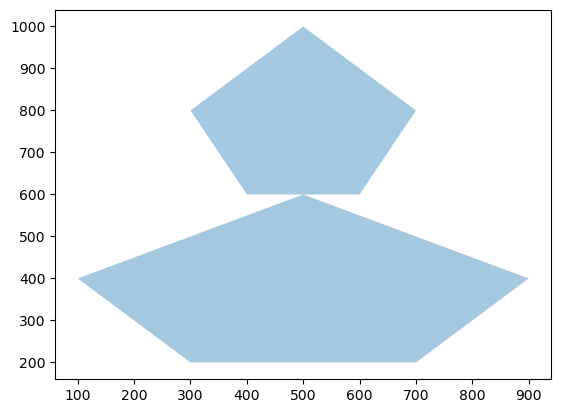

In [4]:
visualize_polygons(p0,p1)

### Problem 1a)

Please fill in all code blocks marked with a #TODO.

In [5]:
def threshold_activation1(x):
    """

    """
    y = np.copy(x)
    y[y <= 0] = 0
    y[y > 0] = 1
    return y


def and_gate(x):
    """
        x: np array of shape (n, 1)
        return: 1 if all elements of x are 1, else 0
    """
    for i in x:
        if i <= 0:
            return 0
        
    return 1


def or_gate(x):
    """
        x: tuple value from AND gates
    """
    if x[0] <= 0 and x[1] <= 0:
        return 0
    else:
        return 1


def analytical_parameters(p0, p1):
    """

    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b

def predict_output_v1(X, W, b):
    """

    """
    predictions = []
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """
    #TODO: Update usage of the gates in this function
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Through Data Points
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        # second_gate_output = and_gate(second_polygon)
        # Output layer
       # input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = first_gate_output
        predictions.append(prediction)
    return predictions

def calc_accuracy(true_y, pred_y):
    """

    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`

Accuracy:  1.0


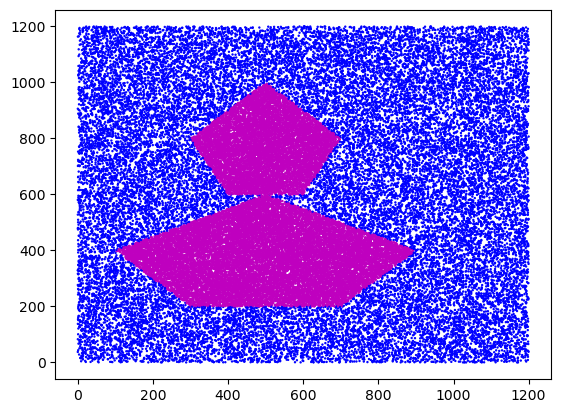

In [6]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the top polygon are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

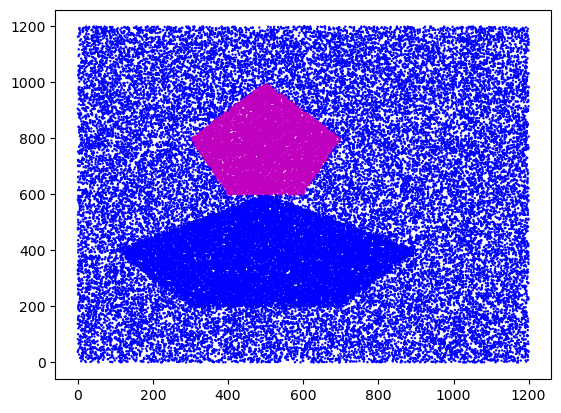

In [7]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d)

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.

In [8]:
import torch
import torch.nn as nn



class MLP1(nn.Module):
  def __init__(self):
    super().__init__()

    self.first_layer = nn.Linear(2, 10)
    self.second_layer = nn.Linear(10, 2)
    self.output = nn.Linear(2, 1)
    self.activation = nn.Sigmoid()

    for layer in [self.first_layer, self.second_layer, self.output]:
      nn.init.xavier_uniform_(layer.weight)

  def forward(self, x):
    x = self.activation(self.first_layer(x))
    x = self.activation(self.second_layer(x))
    x = self.activation(self.output(x))

    return x
      

In [9]:
def accuracy(y_hat, y):
  prediction = (y_hat > 0.5).float()
  return (prediction == y).float().mean().item()

In [10]:
import numpy as np
import torch
import torch.nn as nn

def train(model, x, y, test_x, test_y, loss_function, accuracy_function, batch_size, max_epochs, lr):
  loss_function = nn.BCELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  if isinstance(x, np.ndarray):
    x = torch.FloatTensor(x)

  if isinstance(y, np.ndarray):
    y = torch.FloatTensor(y)

  if isinstance(test_x, np.ndarray):
    test_x = torch.FloatTensor(test_x)

  if isinstance(test_y, np.ndarray):
    test_y = torch.FloatTensor(test_y)

  if batch_size is None:
    batch_size = len(x)

  dataset = torch.utils.data.TensorDataset(x, y)
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

  losses = []
  accuracies = []
  test_accuracy = []

  for i in range(max_epochs):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    num_batches = 0

    for batch_x, batch_y in dataloader:

      y_hat = model(batch_x)
      loss = loss_function(y_hat, batch_y)
      acc = accuracy_function(y_hat, batch_y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      epoch_loss += loss.item()
      epoch_acc += acc
      num_batches += 1

    accuracies.append(epoch_acc / num_batches)
    losses.append(epoch_loss / num_batches)


    avg_loss = epoch_loss / len(dataloader)
    avg_acc = epoch_acc / len(dataloader)

    # evaluation

    model.eval()
    with torch.no_grad():
      test_prediction = (model(test_x) > 0.5).float()
      test_acc = (test_prediction.eq(test_y).sum().item()) / len(test_y)

      test_accuracy.append(test_acc)


    if i % 5 == 0 or i == max_epochs - 1:

      print("iteration",i,"loss:", avg_loss, "accuracy:",avg_acc)



  fig0=plt.figure(0)
  plt.plot(losses,'-')
  plt.xlabel('Iteration', fontsize=18)
  plt.ylabel('Loss', fontsize=16)
  plt.show()
  fig1=plt.figure(1)
  plt.plot(accuracies,'-')
  plt.xlabel('Iteration', fontsize=18)
  plt.ylabel('Accuracy', fontsize=16)
  plt.show()

  return losses, accuracies, test_accuracy

In [11]:
x_train, x_test = X[:50000], X[50000:]
y_train, y_test = Y[:50000], Y[50000:]


X_train = torch.tensor(x_train, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(x_test, dtype=torch.float32)
Y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

seeds = [0, 1, 2, 3, 4]
results = []


train_accuracy, test_accuracy = [], []

for seed in seeds:
  torch.manual_seed(seed)
  model = MLP1()
  loss_fn = nn.BCELoss()
  losses, train_accs, test_accs = train(
        model,
        X_train, Y_train,
        X_test, Y_test,
        loss_fn,
        accuracy,
        batch_size=5,
        max_epochs=50,
        lr=0.05
    )
  results.append((losses, train_accs, test_accs))

iteration 0 loss: 0.6491049527794123 accuracy: 0.6036600125789642


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn



class MLP2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layers = nn.Sequential(
            nn.Linear(2, 32),  # Wider first layer
            nn.Sigmoid(),
            nn.Linear(32, 16),
            nn.Sigmoid(),
            nn.Linear(16, 8),
            nn.Sigmoid(),
            nn.Linear(8, 4),
            nn.Sigmoid(),
            nn.Linear(4, 1),
            nn.Sigmoid()
    )

    for layer in self.layers:
        if isinstance(layer, nn.Linear):
            nn.init.xavier_uniform_(layer.weight)

  def forward(self, x):
    return self.layers(x)
      

In [ ]:
x_train, x_test = X[:50000], X[50000:]
y_train, y_test = Y[:50000], Y[50000:]


X_train = torch.tensor(x_train, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(x_test, dtype=torch.float32)
Y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

seeds = [0, 1, 2, 3, 4]
results = []


train_accuracy, test_accuracy = [], []

for seed in seeds:
  torch.manual_seed(seed)
  model = MLP1()
  loss_fn = nn.BCELoss()
  losses, train_accs, test_accs = train(
        model,
        X_train, Y_train,
        X_test, Y_test,
        loss_fn,
        accuracy,
        batch_size=5,
        max_epochs=50,
        lr=0.05
    )
  results.append((losses, train_accs, test_accs))

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [ ]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST
from torch.utils.data import SubsetRandomSampler

### Data Loading

In [ ]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

## Problem 2a)

### Design Model

In [ ]:
class CNNet(nn.Module):

    """

    """

    def __init__(self):
        """

        """
        ## Inherent Torch Module
        super(CNNet, self).__init__()
        ##TODO: Initialize Model Layers

    def forward(self, x):
        """

        """
        ##TODO: Setup Forward Pass
        return NotImplementedError

### Model Training

In [ ]:
def train(model,
          optimizer,
          loss,
          lr,
          epochs=50,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          **kwargs):
    """
    #TODO: Implement a training loop
    # Your function can return the model, train loss, and validation accuracy
    """
    # TODO:
    raise NotImplementedError

In [ ]:
## Hyperparameters
EPOCH = 50
LR = ##TODO: Choose a Learning Rate

## Setting up the model, optimizer, and loss function
model = CNNet()
optimizer = ##TODO: Choose an optimized
loss_f = ##TODO: Choose a loss

SyntaxError: invalid syntax (2267407034.py, line 3)

In [ ]:
## Run Training Loop
out = train(model, optimizer, loss_f, LR)

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [ ]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = ##TODO: Use the same from above or consider alternatives

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In [ ]:
##TODO: Try to improve upon your previous architecture

### Model Training

In [ ]:
##TODO: Fit and evaluate your model. What do you observe?

## Problem 2c)

Write down your response in the final report.